In [1]:
from datetime import datetime
import numpy as np
import pandas
import matplotlib.pyplot as plt
import pyproj
import rasterio
import openpyxl

In [2]:
survey1 = pandas.read_excel("Vaughan-Lewis Icefall Day 2.xlsx")
survey2 = pandas.read_excel("Vaughan-Lewis Icefall Day 7.xlsx")

In [3]:
lat1, lon1 = survey1["Latitude"], survey1["Longitude"]
lat2, lon2 = survey2["Latitude"], survey2["Longitude"]

In [4]:
transformer = pyproj.Transformer.from_crs(4326, 32608)
x1, y1 = transformer.transform(lat1, lon1)
x2, y2 = transformer.transform(lat2, lon2)

In [5]:
dx, dy = x2 - x1, y2 - y1

/var/folders/p3/gs65vvgs1wd90mnxb3q3hvy80000gp/T/ipykernel_4344/1616797367.py:1: RuntimeWarning: invalid value encountered in subtract
  dx, dy = x2 - x1, y2 - y1


/Users/ichittumuri/Documents/GitHub/Glacier-Velocity-Strain-Rates/.venv/lib/python3.9/site-packages/matplotlib/quiver.py:630: RuntimeWarning: Mean of empty slice.
  amean = a[~self.Umask].mean()
/Users/ichittumuri/Documents/GitHub/Glacier-Velocity-Strain-Rates/.venv/lib/python3.9/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


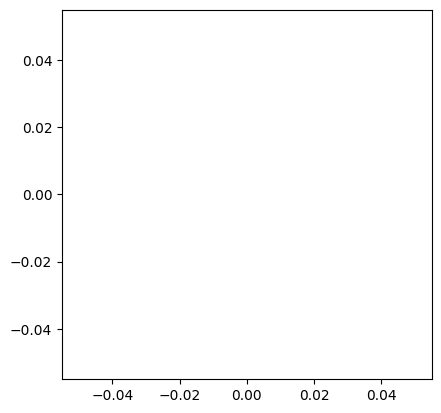

In [6]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.quiver(x1, y1, dx, dy);

In [7]:
time_strings1 = survey1["Averaging start"]
time_strings2 = survey2["Averaging start"]
fmt = "%Y-%m-%d %H:%M:%S"
length = 19 # Cut off some unnecessary data
times1 = [datetime.strptime(timestr[:length], fmt) for timestr in time_strings1]
times2 = [datetime.strptime(timestr[:length], fmt) for timestr in time_strings2]
dt = np.array([(t2 - t1).total_seconds() for t1, t2 in zip(times1, times2)])

KeyError: 'Averaging start'